In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns
import os
import fnmatch
from collections import Counter

# Fig S1a

In [3]:
cluster_pick_file = '/home/shenz4/data/Vitality/ns66_MAGs/all_bins+ns66/dereplicated/prokaryota_nonredundant/data_tables/Wdb.csv'
cluster_pick_df = pd.read_csv(cluster_pick_file, sep=',', index_col=0)
cluster_info_file = '/home/shenz4/data/Vitality/ns66_MAGs/all_bins+ns66/dereplicated/prokaryota_nonredundant/data_tables/Cdb.csv'
cluster_info_df = pd.read_csv(cluster_info_file, sep=',', index_col=0)
ns66_dir = '/home/shenz4/data/Vitality/ns66_MAGs/all_bins_virusRemoved/predereplicated/prokaryota/'
ns66_genomes = sorted(fnmatch.filter(os.listdir(ns66_dir), '*.fa'))
collection_lst = []
for i in cluster_info_df.index:
    if i in ns66_genomes:
        collection_lst.append('New sample')
    else:
        collection_lst.append('ELSG')
cluster_info_df['collection'] = collection_lst
print(Counter(cluster_info_df['collection']))
cluster_info_df.head()

Counter({'ELSG': 9483, 'New sample': 4761})


,threshold,cluster_method,comparison_algorithm,primary_cluster,original_secondary_cluster,secondary_cluster,collection
genome,,,,,,,
V1540B_Ac+Ch_T3_prok_bin.47.fa,0.05,single,fastANI,1,1_1,1_1,New sample
V1845B_Ac+Ch_T3_prok_bin.7.fa,0.05,single,fastANI,1,1_1,1_1,ELSG
V1845B_Ac_T3_prok_bin.10.fa,0.05,single,fastANI,1,1_1,1_1,ELSG
V1342B_Ac+Ch_prok_bin.4.fa,0.05,single,fastANI,2,2_0,2_0,ELSG
V1695B_Ac+Ch_T3_prok_bin.71.fa,0.05,single,fastANI,3,3_1,3_1,New sample


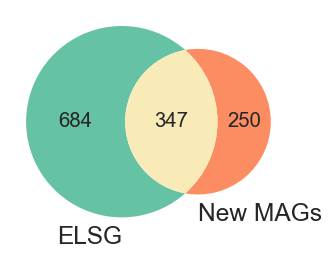

In [4]:
sns.set(font_scale=1.7)
colors = sns.color_palette('Set2')
plt.figure(figsize=(5,5))
ELSG_set = set(cluster_info_df.loc[cluster_info_df['collection']=='ELSG', 'secondary_cluster'])
new_set = set(cluster_info_df.loc[cluster_info_df['collection']=='New sample', 'secondary_cluster'])
venn2([ELSG_set, new_set], ['ELSG', 'New MAGs'], 
      set_colors=(colors[0], colors[1]), alpha=1)
plt.tight_layout()

# Fig S1b

In [15]:
prok_classi = pd.DataFrame()
for file in ['/home/shenz4/data/Vitality/ns66_MAGs/all_bins_virusRemoved/GTDB_207v2/gtdbtk.bac120.summary.tsv', 
             '/home/shenz4/data/Vitality/ns66_MAGs/all_bins_virusRemoved/GTDB_207v2/gtdbtk.ar53.summary.tsv']:
    prok_classi = pd.concat([prok_classi, pd.read_csv(file, sep='\t', index_col=0)], axis=0)
prok_classi['visit'] = ['T1' if 'T1' in i else 'T3' for i in prok_classi.index]
prok_classi['domain'] = [i.split('d__')[1].split(';')[0] if 'd__' in i else i for i in prok_classi['classification']]
prok_classi['genus'] = [i.split(';g__')[1].split(';')[0] if ';g' in i else i for i in prok_classi['classification']]
prok_classi['species'] = [i.split(';s__')[1] if ';s' in i else i for i in prok_classi['classification']]
print('Prokaryotic bins:', len(prok_classi))

Prokaryotic bins: 5106


In [16]:
novel_clusters = list(new_set-ELSG_set)
print('Novel clusters:', len(novel_clusters))
novel_cluster_genus = []
novel_cluster_species = []
for clst in novel_clusters:
    cur_mag = cluster_info_df.loc[cluster_info_df['secondary_cluster']==clst].index
    cur_mag = [i.replace('.fa','') for i in list(cur_mag)]
    cur_species = np.array(prok_classi.loc[cur_mag,'species'].drop_duplicates())
    cur_species = cur_species[cur_species!='']
    if len(cur_species) > 0:
        cur_species = cur_species[0]
    else:
        cur_species = ''
    cur_genus = np.array(prok_classi.loc[cur_mag,'genus'].drop_duplicates())
    cur_genus = cur_genus[cur_genus!='']
    if len(cur_genus) > 0:
        cur_genus = cur_genus[0]
    else:
        cur_genus = ''
    novel_cluster_species.append(cur_species)
    novel_cluster_genus.append(cur_genus)

Novel clusters: 250


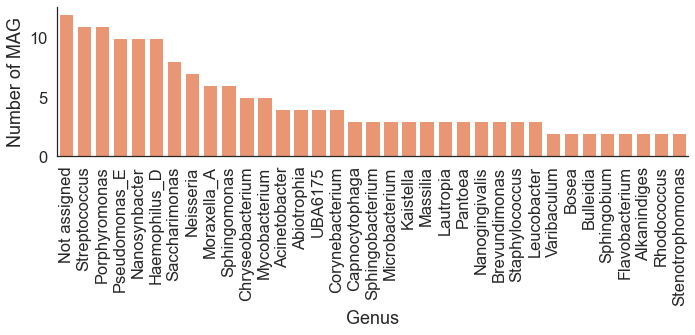

In [17]:
genus_count_df = pd.DataFrame.from_dict(Counter(novel_cluster_genus), orient='index').sort_values(0, ascending=False)
genus_count_df.index = ['Not assigned' if i=='' else i for i in genus_count_df.index]
genus_count_df = genus_count_df.reset_index()
sns.set(style='white', font_scale=1.5)
plt.figure(figsize=(10,5))
sns.barplot(data=genus_count_df.iloc[:35,], x='index', y=0, color=colors[1])
plt.xlabel('Genus')
plt.ylabel('Number of MAG')
plt.xticks(rotation=90)
sns.despine(top=True)
plt.tight_layout()
# plt.savefig('../figs/AD_MAG_taxonomy.eps', format='eps')

In [18]:
genus_count_df.head()

,index,0
0,Not assigned,12
1,Streptococcus,11
2,Porphyromonas,11
3,Pseudomonas_E,10
4,Nanosynbacter,10


# Fig S1c

RefSeq+SMGC (1158, 5)
RefSeq+SMGC+ELSG (1158, 5)
RefSeq+SMGC+ELSG+new MAG (1362, 5)
['B_Ac_T1' 'B_Ac_T3' 'B_Ch_T1' 'B_Ch_T3' 'B_N_T3' 'M_Ac_T3' 'M_N_T3']


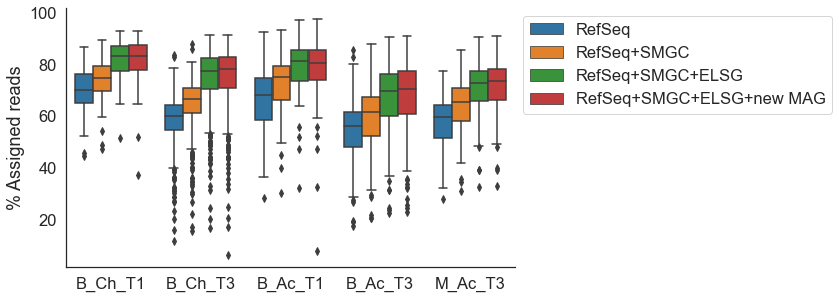

In [5]:
meta_df = pd.read_csv('/data/shenz4/Vitality/ns38-46+56-57+62+66+94+96+Published-vitality-metadata.txt', sep='\t', index_col=1)
meta_df['babymom'] = [i[-1].replace('F','M') for i in meta_df['subject_id']]
meta_df['babymom_site_visit'] = meta_df['babymom']+'_'+meta_df['site_specific']+'_'+(meta_df['visit']).astype(str)
meta_df['babymom_site_visit'] = [i.replace('_nan','') for i in meta_df['babymom_site_visit']]
meta_df['batch'] = [i.replace('novaseq', '').replace('6000','ns6000') for i in meta_df['location']]

baseline_file = '/data/shenz4/Vitality/kraken_results/ns38-46+56-57+62+66.kraken.20220511_standard+T2T.summary'
baseline_df = pd.read_csv(baseline_file, sep='\t', index_col=0)
baseline_df = baseline_df[sorted(baseline_df.columns.values)]
baseline_df.columns = [col.split('.')[0] for col in baseline_df.columns]
baseline_rate = (baseline_df.loc['atRoot'].astype(float)-baseline_df.loc['Homo sapiens'].astype(float))/(100-baseline_df.loc['Homo sapiens'].astype(float))*100
all_rate_diff_df = pd.DataFrame({'Diff':0,'Rate':baseline_rate,'Database':'RefSeq'}).reset_index()
all_rate_diff_df['Group'] = np.array(meta_df.loc[all_rate_diff_df['index'],'babymom_site_visit'])
sum_files = ['/data/shenz4/Vitality/kraken_results/ns38-46+56-57+62+66.kraken.20220511_standard+SMGC+T2T.summary',
             '/data/shenz4/Vitality/kraken_results/ns38-46+56-57+62+66.kraken.20220511_standard+SMGC+ELSGv2+T2T.summary',
             '/data/shenz4/Vitality/kraken_results/ns38-46+56-57+62+66+94+96.kraken.20220511_standard+SMGC+ELSGv2+ns66+T2T.summary',
            ]
for i, sum_file in enumerate(sum_files):
    group = sum_file.replace('++','+').split('.kraken.')[-1].split('_')[-1].split('.summary')[0].replace('standard','RefSeq').replace('+T2T','').replace('v2','').replace('ns66','new MAG')
    sum_df = pd.read_csv(sum_file, sep='\t', index_col=0)
    sum_df.columns = [col.split('.')[0] for col in sum_df.columns]
    if 'host' in sum_file:
        sum_rate = sum_df.loc['atRoot'].astype(float)-sum_df.loc['Homo sapiens'].astype(float)+all_rate_diff_df.loc[all_rate_diff_df['Database']=='RefSeq+SMGC+ELSGv1'].set_index('index').loc[sum_df.columns,'Rate']
    else:
        sum_rate = (sum_df.loc['atRoot'].astype(float)-sum_df.loc['Homo sapiens'].astype(float))/(100-sum_df.loc['Homo sapiens'].astype(float))*100
    rate_diff_df = pd.DataFrame({'Diff':0, 'Rate':sum_rate, 'Database':group}).reset_index()
    rate_diff_df['Group'] = np.array(meta_df.loc[rate_diff_df['index'],'babymom_site_visit'])
    all_rate_diff_df = pd.concat([all_rate_diff_df, rate_diff_df], axis=0)
    print(group, rate_diff_df.shape)
all_rate_diff_df['batch'] = list(meta_df.loc[all_rate_diff_df['index'], 'batch'])
all_rate_diff_df = all_rate_diff_df.loc[['ctrl' not in i.lower() and 'empty' not in i.lower() for i in all_rate_diff_df['Group']]]
print(np.unique(all_rate_diff_df['Group']))
# all_rate_diff_df['Group'] = [g.replace('B_', '').replace('T1', '2-3 mo').replace('T3', '1 yr').replace('_', ' ') for g in all_rate_diff_df['Group']]
all_rate_diff_df['Database'] = [d.replace('host','RefSeq+SMGC+ELSG+pet') for d in all_rate_diff_df['Database']]
all_rate_diff_df = all_rate_diff_df.sort_values(by=['batch', 'Database', 'Group'])

# Plot
my_order = ['B_Ch_T1', 'B_Ch_T3', 'B_Ac_T1', 'B_Ac_T3', 'M_Ac_T3']
sns.set(style='white', font_scale=1.5)
sns.set_palette('tab10')
plt.figure(figsize=(12,4.5))
sns.boxplot(data=all_rate_diff_df, x='Group', y='Rate', hue='Database', order=my_order)
plt.ylabel('% Assigned reads')
plt.xlabel('')
plt.legend(title='', bbox_to_anchor=(1,1))
sns.despine(top=True)
plt.tight_layout()

In [6]:
all_rate_diff_df.groupby('Database').median()

,Diff,Rate
Database,,
RefSeq,0.0,60.197908
RefSeq+SMGC,0.0,66.266781
RefSeq+SMGC+ELSG,0.0,75.561827
RefSeq+SMGC+ELSG+new MAG,0.0,75.838522
